# Exercise 2: Linear Regression
----------
In this exercise, you will implement a first machine learning model and learn about the *pandas* and *scikit-learn* libraries.

## Dataset
We will use a dataset originally published here: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/9/auto+mpg)

Download the dataset from Moodle. The dataset consists of two files:
- auto-mpg.data: contains the data
- auto-mpg.names: contains information about the dataset

The dataset contains data from 398 different car models. In addition to the car name, it includes information about:
- fuel consumption in miles per gallon
- cylinders
- engine displacement
- horsepower
- weight
- acceleration
- model year
- origin

The goal of this exercise is to predict the fuel consumption of cars using the other available attributes as input to a linear regression algorithm.

## Importing Data with *pandas*

The *pandas* library is a very important library often used in data science to handle datasets. It includes functions for analyzing, exploring and manipulating data.
You can find information about *pandas* on their website: [https://pandas.pydata.org/docs/index.html](https://pandas.pydata.org/docs/index.html)

When working with datasets in *pandas*, the data is loaded into a pandas DataFrame, which is a two-dimensional structure similar to a table. In general the columns of the DataFrame refer to the different features of the data set, while the rows represent the instances of the data. *Pandas* provides many ways to manipulate and analyze the data in the DataFrame, e.g. for calculating statistical properties or cleaning the data.


In [8]:
import pandas as pd

data = {
    "Height": [180, 165, 172, 201, 177],
    "Weight": [80, 56, 105, 102, 68],
    "Name": ['Jack', 'John', 'Oliver', 'George', 'William']
}

# load the data into a data frame
dataframe = pd.DataFrame(data)

print(dataframe)

   Height  Weight     Name
0     180      80     Jack
1     165      56     John
2     172     105   Oliver
3     201     102   George
4     177      68  William


In [10]:
# the info() function gives you a first overview of the data like the number of rows and columns and the data types.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  5 non-null      int64 
 1   Weight  5 non-null      int64 
 2   Name    5 non-null      object
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [8]:
# Select a column of the dataframe
print(dataframe['Height'])
# The result of the selection is a Pandas Series, which is a one-dimensional array
print(type(dataframe['Height']))

0    180
1    165
2    172
3    201
4    177
Name: Height, dtype: int64
<class 'pandas.core.series.Series'>


In [9]:
# Select rows and columns of the dataframe using loc
# input to loc are the labels of the data
print(dataframe.loc[0:2,['Weight', 'Name']])

   Weight    Name
0      80    Jack
1      56    John
2     105  Oliver


In [10]:
# select a row of the dataframe using iloc
# iloc uses integer-based indexing
print(dataframe.iloc[0:3,1:3])
# this gives the same output as the code block above

   Weight    Name
0      80    Jack
1      56    John
2     105  Oliver


------

## Task 1: Load data
Load the car dataset for this exercise using the read_csv function from *pandas* and take a first look at the data to make sure it loaded properly.

In [8]:
# import pandas library
import pandas as pd
data = pd.read_csv('auto-mpg.data', sep=r'\s+', header=None, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

data.head(15)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


## Task 2: Clean data

As described in the auto-mpg.names file, there are six missing horsepower values in the data set. For this exercise, we will ignore the six cars with this missing information. Use *pandas* to find and delete the six instances with missing horsepower information.

In [10]:
# DataFrame'i yükle
data = pd.read_csv('auto-mpg.data', sep=r'\s+', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])

# Eksik horsepower değerlerini bul ve sil
data = data[data['horsepower'] != '?']  # 'horsepower' sütununda '?' olanları filtrele
data['horsepower'] = data['horsepower'].astype(float)  # 'horsepower' sütununu float tipine dönüştür

# Sonuçları kontrol et
print(data.head(15))  # İlk 10 satırı görüntüle
print(f"Toplam satır sayısı: {len(data)}")  # Kalan satır sayısını yazdır


     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0  3504.0          12.0   
1   15.0          8         350.0       165.0  3693.0          11.5   
2   18.0          8         318.0       150.0  3436.0          11.0   
3   16.0          8         304.0       150.0  3433.0          12.0   
4   17.0          8         302.0       140.0  3449.0          10.5   
5   15.0          8         429.0       198.0  4341.0          10.0   
6   14.0          8         454.0       220.0  4354.0           9.0   
7   14.0          8         440.0       215.0  4312.0           8.5   
8   14.0          8         455.0       225.0  4425.0          10.0   
9   15.0          8         390.0       190.0  3850.0           8.5   
10  15.0          8         383.0       170.0  3563.0          10.0   
11  14.0          8         340.0       160.0  3609.0           8.0   
12  15.0          8         400.0       150.0  3761.0           9.5   
13  14

## Task 3: Linear Regression

Your task is to predict the fuel consumption of the cars in miles per gallon. Use the linear regression formula $\beta = (X^{T}X)^{-1}X^{T}y$ from the lecture to complete this task. Select the available numeric features cylinders, displacement, horsepower, weight, acceleration, model year and origin as input features.

Calculate the root mean square error of your prediction.

In [12]:
import numpy as np

# Girdi ve çıktı değişkenlerini ayarla
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = data['mpg']

# Bias terimi eklemek için birler vektörü ekle (giriş matrisine sabit bir sütun ekliyoruz)
X = np.c_[np.ones(X.shape[0]), X]
y = y.values

# Beta katsayılarını hesapla
X_transpose = X.T
beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
print("Beta katsayıları:", beta)

# Tahminleri hesapla
y_pred = X.dot(beta)

# RMSE'yi hesapla
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print("Root Mean Square Error (RMSE):", rmse)



Beta katsayıları: [-1.72184346e+01 -4.93376319e-01  1.98956437e-02 -1.69511442e-02
 -6.47404340e-03  8.05758383e-02  7.50772678e-01  1.42614050e+00]
Root Mean Square Error (RMSE): 3.2935514183022025


-------------

## Scikit-Learn

As seen in Task 3, the linear regression model can be easily implemented in Python. For more complex algorithms, it makes sense to use existing libraries. *scikit-learn* is a very useful library for machine learning. With the help of *scikit-learn*, many machine learning models can be easily implemented. It also includes methods to transform and pre-process data before applying the machine learning algorithm and can also be used for evaluation.

For example, a linear regression model can be implemented as shown in the following code block.

In [16]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Veri setini yükle (Task 1 ve Task 2'daki işlemlerden sonra bu veri kullanılacak)
data = pd.read_csv('auto-mpg.data', sep=r'\s+', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])

# Eksik horsepower değerlerini kaldır (Task 2)
data = data[data['horsepower'] != '?']
data['horsepower'] = data['horsepower'].astype(float)

# Bağımsız değişkenleri (girdi) ve bağımlı değişkeni (çıktı) ayarla
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = data['mpg']

# Lineer model tanımla ve veriye uydur
lm = LinearRegression(fit_intercept=True).fit(X, y)

# Modelin katsayılarını yazdır
print("Bias (intercept):", lm.intercept_)
print("Katsayılar (coefficients):", lm.coef_)

# Tahminleri hesapla
y_pred = lm.predict(X)

# Root Mean Squared Error (RMSE) hesapla
rmse = mean_squared_error(y, y_pred, squared=False)
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))


Bias (intercept): -17.2184346220175
Katsayılar (coefficients): [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
Root Mean Squared Error (RMSE): 3.29


C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--------------
## Task 4: Optimization and Evaluation

In this task, we want to compare the results of the classical linear regression that we implemented above with the results of a lasso approach. In order to compare the results on unseen data, we have to define a training and a test data set.

a) Use the *scikit-learn* function "train_test_split" to split the data into the two sets. Choose a size of 70% for the training data and 30% for the test data.

In [18]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (X) ve bağımlı değişken (y) daha önce tanımlandı
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = data['mpg']

# Veriyi eğitim (%70) ve test (%30) setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol et
print(f"Eğitim verisi boyutu: {X_train.shape[0]} örnek")
print(f"Test verisi boyutu: {X_test.shape[0]} örnek")


Eğitim verisi boyutu: 274 örnek
Test verisi boyutu: 118 örnek


b) Learn the classic linear regression model on the training dataset and evaluate its performance on the training and test datasets using the root mean square error as the evaluation metric.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modeli tanımla
lm = LinearRegression(fit_intercept=True)

# Eğitim verisi üzerinde modeli eğit
lm.fit(X_train, y_train)

# Eğitim seti üzerinde tahminler yap
y_train_pred = lm.predict(X_train)

# Test seti üzerinde tahminler yap
y_test_pred = lm.predict(X_test)

# Eğitim seti için RMSE hesapla
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Eğitim Seti için RMSE: {train_rmse:.2f}")

# Test seti için RMSE hesapla
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test Seti için RMSE: {test_rmse:.2f}")


Eğitim Seti için RMSE: 3.37
Test Seti için RMSE: 3.17


C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c) Learn a linear regression model with lasso regularization on the training dataset and evaluate its performance on the training and test datasets using the root mean square error as the evaluation metric. Use the "Lasso" module from *scikit-learn* to perform this task and set the alpha-value to 1. Compare the model coefficients and the performance with the classic linear regression approach from above. Which of the models seems to be better suited for the given task?

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Lasso regresyon modelini tanımla, alpha=1 ile düzenlileştirmeyi etkinleştir
lasso = Lasso(alpha=1)

# Lasso modelini eğitim verisi üzerinde eğit
lasso.fit(X_train, y_train)

# Eğitim seti üzerinde tahminler yap
y_train_lasso_pred = lasso.predict(X_train)

# Test seti üzerinde tahminler yap
y_test_lasso_pred = lasso.predict(X_test)

# Eğitim seti için RMSE hesapla
train_lasso_rmse = mean_squared_error(y_train, y_train_lasso_pred, squared=False)
print(f"Lasso Modeli - Eğitim Seti için RMSE: {train_lasso_rmse:.2f}")

# Test seti için RMSE hesapla
test_lasso_rmse = mean_squared_error(y_test, y_test_lasso_pred, squared=False)
print(f"Lasso Modeli - Test Seti için RMSE: {test_lasso_rmse:.2f}")

# Klasik lineer regresyon modeli ile Lasso modelinin koefisiyentlerini karşılaştır
print("Klasik Lineer Regresyon Koefisiyentleri:", lm.coef_)
print("Lasso Regresyon Koefisiyentleri:", lasso.coef_)

# Lasso'nun koefisiyentlerinin sıfırlanan elemanları, regularization'ın etkisini gösterir.


Lasso Modeli - Eğitim Seti için RMSE: 3.54
Lasso Modeli - Test Seti için RMSE: 3.24
Klasik Lineer Regresyon Koefisiyentleri: [-0.35963797  0.01579344 -0.02806989 -0.00600577  0.04119833  0.742086
  1.67379885]
Lasso Regresyon Koefisiyentleri: [-0.         -0.00279641 -0.0170872  -0.00611237  0.          0.63351407
  0.        ]


C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


d) Perform a hyperparameter optimization for the Lasso approach by trying different values for the hyperparameter alpha. Evaluate the performance and find the alpha value with the best performance.

En iyi alpha değeri: 0.11513953993264481
En iyi CV RMSE (5 katlı çapraz doğrulama kullanıldı): 3.51


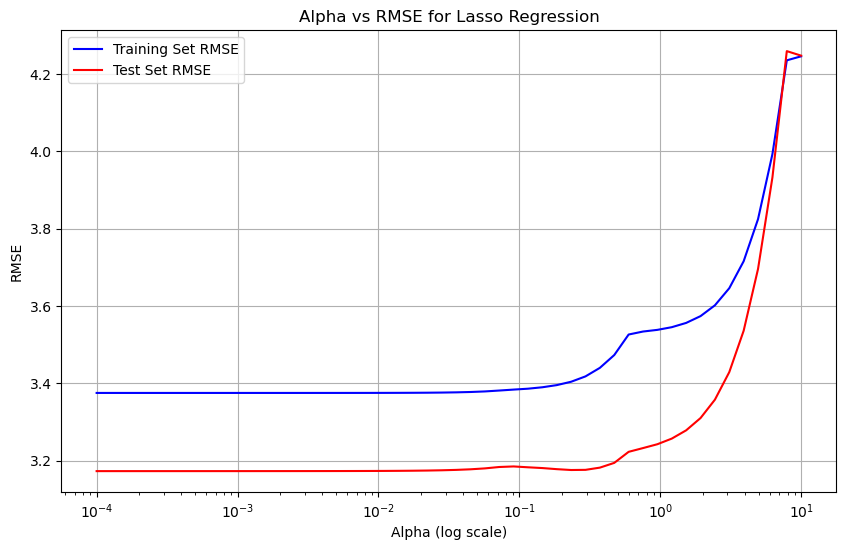

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Lasso modelini tanımla
lasso = Lasso()

# Denenecek alpha değerlerinin listesi
alpha_values = np.logspace(-4, 1, 50)  # 10^-4 ile 10^1 arasında 50 değer

# Parametre grid'ini tanımla
param_grid = {'alpha': alpha_values}

# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Modeli eğitim verisi üzerinde eğit
grid_search.fit(X_train, y_train)

# En iyi alpha değeri ve ilgili performansı al
best_alpha = grid_search.best_params_['alpha']
best_rmse = np.sqrt(-grid_search.best_score_)  # Negatif MSE olduğu için işaretini değiştiriyoruz

# Sonuçları yazdır
print(f"En iyi alpha değeri: {best_alpha}")
print(f"En iyi CV RMSE (5 katlı çapraz doğrulama kullanıldı): {best_rmse:.2f}")

import matplotlib.pyplot as plt

# GridSearchCV ile tüm alpha değerleri üzerinden eğitim ve test seti performansını hesapla
train_rmse = []
test_rmse = []

for alpha in alpha_values:
    # Lasso modelini tanımla ve alpha değerini ayarla
    lasso = Lasso(alpha=alpha)
    
    # Modeli eğitim verisi üzerinde eğit
    lasso.fit(X_train, y_train)
    
    # Eğitim seti için tahmin yap
    train_pred = lasso.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    
    # Test seti için tahmin yap
    test_pred = lasso.predict(X_test)
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

# Alpha vs RMSE grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_rmse, label="Training Set RMSE", color='blue')
plt.plot(alpha_values, test_rmse, label="Test Set RMSE", color='red')
plt.xscale('log')  # Alpha'yı logaritmik olarak göster
plt.xlabel('Alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Alpha vs RMSE for Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()



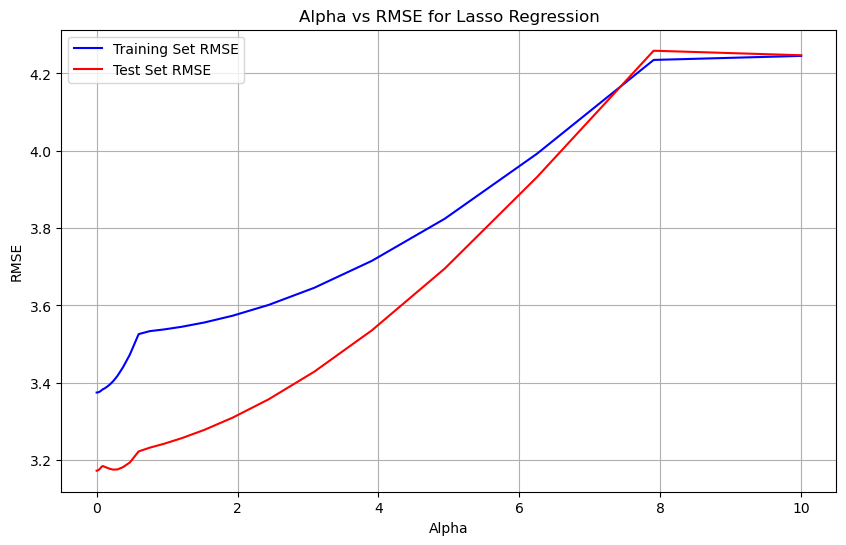

In [28]:
import matplotlib.pyplot as plt

# GridSearchCV ile tüm alpha değerleri üzerinden eğitim ve test seti performansını hesapla
train_rmse = []
test_rmse = []

for alpha in alpha_values:
    # Lasso modelini tanımla ve alpha değerini ayarla
    lasso = Lasso(alpha=alpha)
    
    # Modeli eğitim verisi üzerinde eğit
    lasso.fit(X_train, y_train)
    
    # Eğitim seti için tahmin yap
    train_pred = lasso.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    
    # Test seti için tahmin yap
    test_pred = lasso.predict(X_test)
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

# Alpha vs RMSE grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_rmse, label="Training Set RMSE", color='blue')
plt.plot(alpha_values, test_rmse, label="Test Set RMSE", color='red')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Alpha vs RMSE for Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()
